### Libraries

In [84]:
!pip install sklearn

In [85]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import seaborn as sns

import matplotlib.pyplot as plt

import scipy.stats as stats

### Load data

In [86]:
df_train = pd.read_csv("https://raw.githubusercontent.com/lucastiagooliveira/lucastiagooliveira/master/Kaggle/house-prices-advanced-regression-techniques/train.csv")
df_test = pd.read_csv("https://raw.githubusercontent.com/lucastiagooliveira/lucastiagooliveira/master/Kaggle/house-prices-advanced-regression-techniques/test.csv")

### Show the data has loaded

In [87]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [88]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### Info of the dataset

In [89]:
print(df_train.head().info())
print('_'*50)
print(df_test.head().info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5 non-null      int64  
 1   MSSubClass     5 non-null      int64  
 2   MSZoning       5 non-null      object 
 3   LotFrontage    5 non-null      float64
 4   LotArea        5 non-null      int64  
 5   Street         5 non-null      object 
 6   Alley          0 non-null      object 
 7   LotShape       5 non-null      object 
 8   LandContour    5 non-null      object 
 9   Utilities      5 non-null      object 
 10  LotConfig      5 non-null      object 
 11  LandSlope      5 non-null      object 
 12  Neighborhood   5 non-null      object 
 13  Condition1     5 non-null      object 
 14  Condition2     5 non-null      object 
 15  BldgType       5 non-null      object 
 16  HouseStyle     5 non-null      object 
 17  OverallQual    5 non-null      int64  
 18  OverallCond   

### Dependent variable

In [90]:
target = df_train.SalePrice

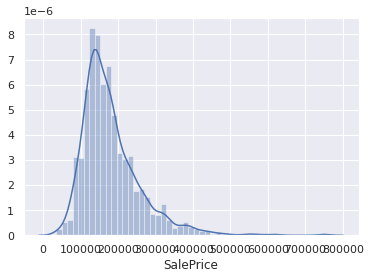

In [91]:
sns.set()

sns.distplot(target)

### Separation the type - Between: quantitative and qualitative

In [92]:
quant = [i for i in df_train.columns if df_train[i].dtypes != object]
quali = [i for i in df_train.columns if df_train[i].dtypes == object]

### Correlation

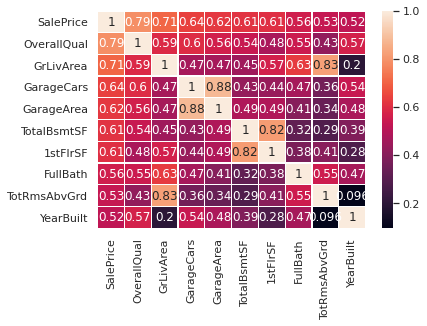

In [93]:
sns.heatmap(df_train[df_train.corr().SalePrice.sort_values(ascending = False).index[0:10]].corr(),
            annot = True,
            linewidths=.3)

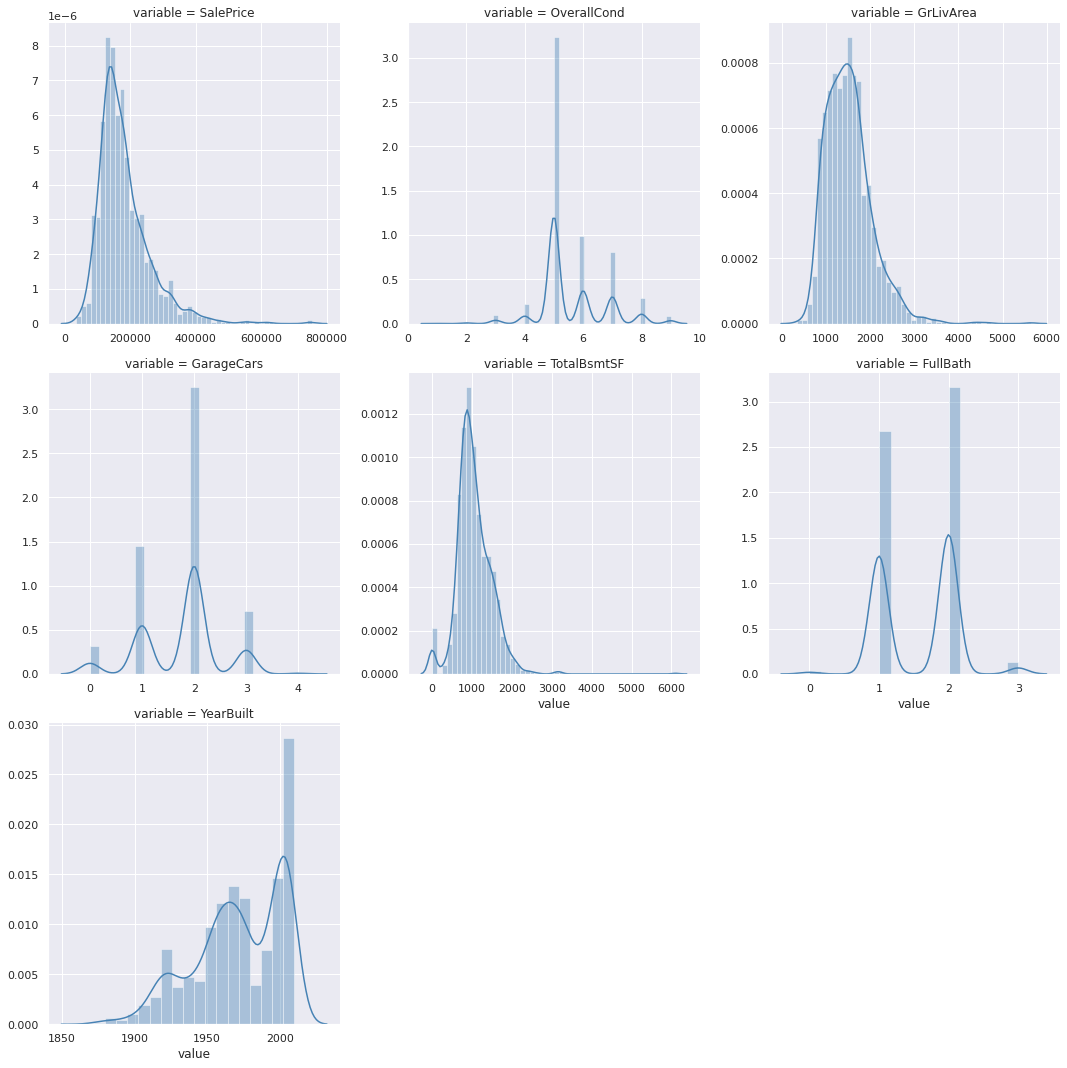

In [94]:
var_used = ['SalePrice', 'OverallCond', 'GrLivArea','GarageCars', 'TotalBsmtSF','FullBath','YearBuilt']

sns.set(style="darkgrid")

melted = pd.melt(df_train, value_vars= var_used)

g = sns.FacetGrid(melted, col = 'variable', margin_titles=True, col_wrap = 3, sharex = False, sharey = False, height = 5)

g.map(sns.distplot, "value", color="steelblue")

### Set train and test set


In [95]:
train = df_train[var_used]
var_used_test = var_used.copy()
var_used_test.remove('SalePrice')
test = df_test[var_used_test]

### Remove outliers

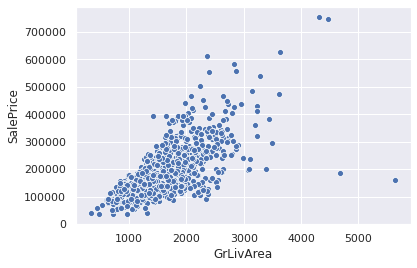

In [96]:
sns.scatterplot(x = train.GrLivArea, y = train.SalePrice)

In [99]:
drop_out = list(train.loc[train.GrLivArea > 4500].index)
train = train.drop(labels = drop_out, axis = 0)

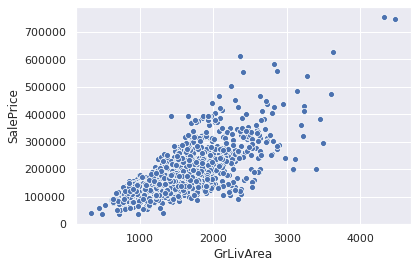

In [100]:
sns.scatterplot(x = train.GrLivArea, y = train.SalePrice)

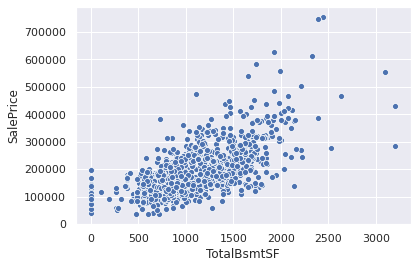

In [101]:
sns.scatterplot(x = train.TotalBsmtSF, y = train.SalePrice)

In [103]:
drop_out_2 = list(train.loc[train.TotalBsmtSF > 3200].index)
train = train.drop(labels = drop_out_2, axis = 0)

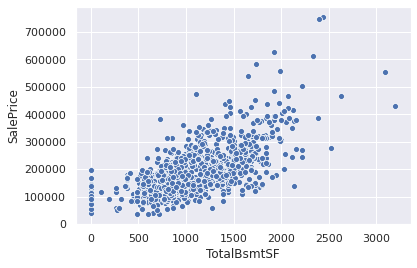

In [105]:
sns.scatterplot(x = train.TotalBsmtSF, y = train.SalePrice)

### Impute data missing

In [106]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values = np.nan, strategy = 'mean')
test = impute.fit_transform(test)
test = pd.DataFrame(test)
test.columns = var_used_test

### Skewness

In [107]:
print('Train dataset skewness:\n', train.apply(lambda x:stats.skew(x)))
print('_'*25)
print('Test dataset skewness:\n', test.apply(lambda x:stats.skew(x)))

Train dataset skewness:
 SalePrice      1.883147
OverallCond    0.689307
GrLivArea      1.010133
GarageCars    -0.342567
TotalBsmtSF    0.437664
FullBath       0.032539
YearBuilt     -0.610787
dtype: float64
_________________________
Test dataset skewness:
 OverallCond    0.448703
GrLivArea      1.129240
GarageCars    -0.107068
TotalBsmtSF    0.813031
FullBath       0.295534
YearBuilt     -0.587052
dtype: float64


### Log transformation

Fitting log transformation in columns with skewness more than 1 (train dataset)

In [108]:
# Transformation in trainset
train.SalePrice = train.SalePrice.apply(lambda x: np.log1p(x))
train.GrLivArea = train.GrLivArea.apply(lambda x: np.log1p(x))
train.TotalBsmtSF = np.asanyarray([np.log1p(x) if x != 0 else x for x in train.TotalBsmtSF])

#Transformation in testset

test.GrLivArea = test.GrLivArea.apply(lambda x: np.log1p(x))
test.TotalBsmtSF = np.asanyarray([np.log1p(x) if x != 0 else x for x in test.TotalBsmtSF])

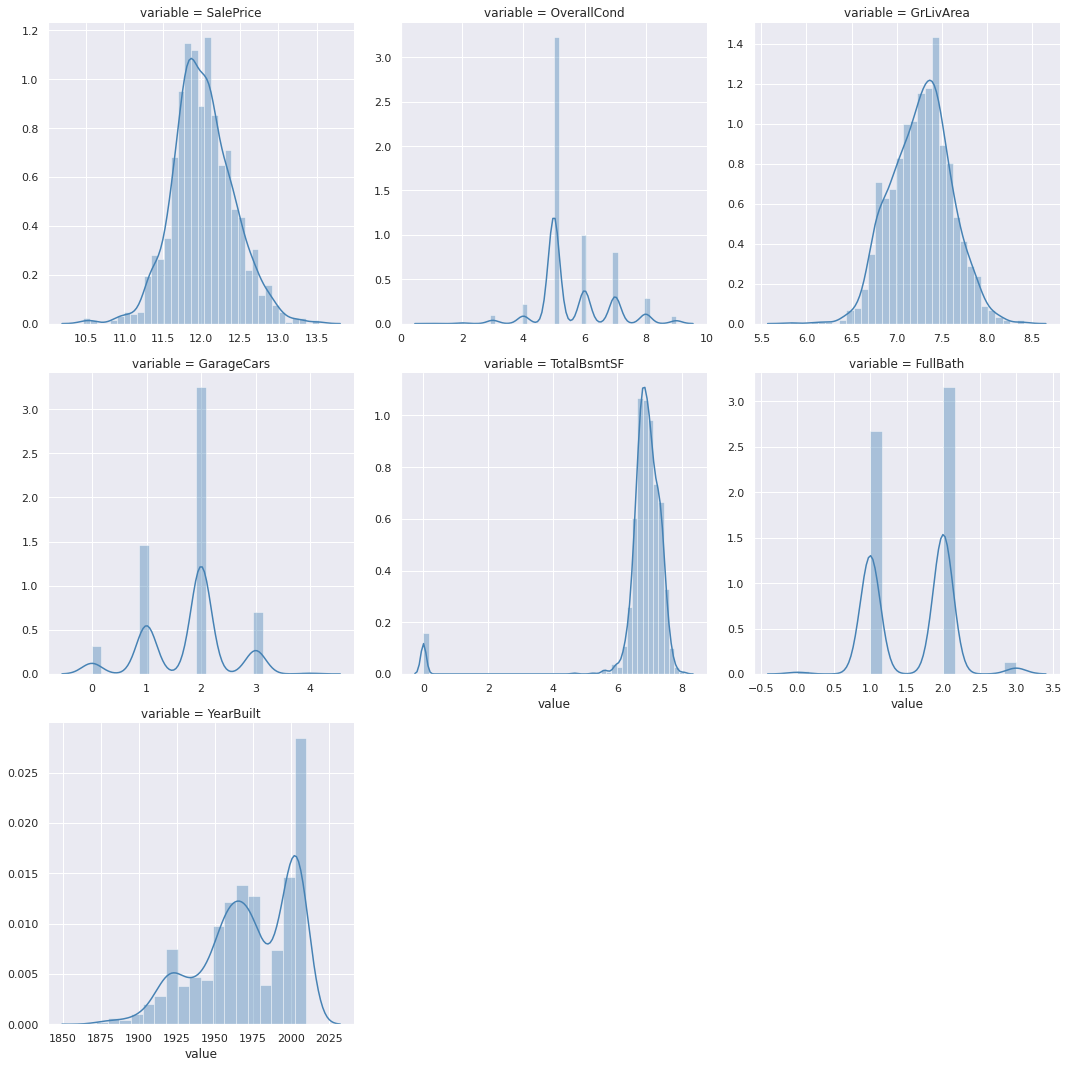

In [109]:
sns.set(style="darkgrid")

melted = pd.melt(train)

g = sns.FacetGrid(melted, col = 'variable', margin_titles=True, col_wrap = 3, sharex = False, sharey = False, height = 5)

g.map(sns.distplot, "value", color="steelblue")

### Normalization

In [110]:
from sklearn.preprocessing import StandardScaler

X = train[var_used_test]
y = train.SalePrice

scaler = StandardScaler()

X = scaler.fit_transform(X)

scaler_2 = StandardScaler()

test = scaler_2.fit_transform(test)

### Train and test split

In [111]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Model


In [112]:
def build_model(act = 'relu', train_rate = 0.0001):
  model = keras.Sequential([
                           layers.Dense(6, activation = act, input_shape = X_train[1].shape),
                           layers.Dense(6, activation = act),
                           layers.Dense(1)
                           ])
  
  optimizer = keras.optimizers.RMSprop(train_rate)

  model.compile(loss = 'mse',
                optimizer = optimizer,
                metrics = ['mse', 'mae'])
  return model

In [113]:
model = build_model()

### Training

In [114]:
train_model = model.fit(X_train, y_train,
  epochs= 500)

Epoch 1/500
37/37 [==============================] - 0s 1ms/step - loss: 132.8528 - mse: 132.8528 - mae: 11.5125
Epoch 2/500
37/37 [==============================] - 0s 1ms/step - loss: 131.8162 - mse: 131.8162 - mae: 11.4671
Epoch 3/500
37/37 [==============================] - 0s 1ms/step - loss: 130.8038 - mse: 130.8038 - mae: 11.4225
Epoch 4/500
37/37 [==============================] - 0s 1ms/step - loss: 129.7806 - mse: 129.7806 - mae: 11.3773
Epoch 5/500
37/37 [==============================] - 0s 1ms/step - loss: 128.7412 - mse: 128.7412 - mae: 11.3311
Epoch 6/500
37/37 [==============================] - 0s 1ms/step - loss: 127.6915 - mse: 127.6915 - mae: 11.2842
Epoch 7/500
37/37 [==============================] - 0s 1ms/step - loss: 126.6311 - mse: 126.6311 - mae: 11.2367
Epoch 8/500
37/37 [==============================] - 0s 1ms/step - loss: 125.5531 - mse: 125.5531 - mae: 11.1882
Epoch 9/500
37/37 [==============================] - 0s 1ms/step - loss: 124.4668 - mse: 124.466

In [115]:
loss, mse, mae = model.evaluate(X_test, y_test, verbose=2)

10/10 - 0s - loss: 0.0617 - mse: 0.0617 - mae: 0.1604


In [116]:
test_pred = model.predict(test).flatten()

In [117]:
test_pred = np.expm1(test_pred)

In [118]:
test_pred

array([121425.41 , 170611.1  , 183199.38 , ..., 159795.45 , 122072.375,
       213226.89 ], dtype=float32)

In [119]:
train_model_2 = model.fit(X, y,
  epochs= 1000)

Epoch 1/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0654 - mse: 0.0654 - mae: 0.1699
Epoch 2/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0646 - mse: 0.0646 - mae: 0.1690
Epoch 3/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0638 - mse: 0.0638 - mae: 0.1685
Epoch 4/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0630 - mse: 0.0630 - mae: 0.1679
Epoch 5/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0624 - mse: 0.0624 - mae: 0.1664
Epoch 6/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0617 - mse: 0.0617 - mae: 0.1657
Epoch 7/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0610 - mse: 0.0610 - mae: 0.1654
Epoch 8/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0602 - mse: 0.0602 - mae: 0.1642
Epoch 9/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0596 - mse: 0.0596 - mae: 0.1636
Epoch 10/1000
46/46

In [120]:
test_pred_2 = np.expm1(model.predict(test).flatten())

### Submission data set

In [121]:
sub_tensor = pd.DataFrame({ 'Id': df_test.Id,
                            'SalePrice': test_pred_2})
sub_tensor

,Id,SalePrice
0,1461,116775.304688
1,1462,159335.265625
2,1463,196325.312500
3,1464,209830.843750
4,1465,177671.796875
...,...,...
1454,2915,118162.312500
1455,2916,112781.109375
1456,2917,168269.812500
1457,2918,115037.351562


### Save File 

In [122]:
sub_tensor.to_csv('submission_tensorflow .csv',index=False)